In [115]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import sklearn.metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [116]:
data = pd.read_csv("D:/SEMESTER 6/Data Mining/tugas 4/nassCDS.csv")
data

Unnamed: 0  dvcat    weight   dead  airbag seatbelt  frontal sex  \
0               1  25-39    25.069  alive    none   belted        1   f   
1               2  10-24    25.069  alive  airbag   belted        1   f   
2               3  10-24    32.379  alive    none     none        1   f   
3               4  25-39   495.444  alive  airbag   belted        1   f   
4               5  25-39    25.069  alive    none   belted        1   f   
...           ...    ...       ...    ...     ...      ...      ...  ..   
26212       26213  25-39  3179.688  alive    none   belted        1   m   
26213       26214  10-24    71.228  alive  airbag   belted        1   m   
26214       26215  10-24    10.474  alive  airbag   belted        1   f   
26215       26216  25-39    10.474  alive  airbag   belted        1   f   
26216       26217  25-39    10.474  alive  airbag   belted        1   m   

       ageOFocc  yearacc  yearVeh     abcat occRole  deploy  injSeverity  \
0            26     1997   1990.0   unavail  driver       0          3.0   
1            72     1997   1995.0    deploy  driver       1          1.0   
2            69     1997   1988.0   unavail  driver       0          4.0   
3            53     1997   1995.0    deploy  driver       1          1.0   
4            32     1997   1988.0   unavail  driver       0          3.0   
...         ...      ...      ...       ...     ...     ...          ...   
26212        17     2002   1985.0   unavail  driver       0          0.0   
26213        54     2002   2002.0  nodeploy  driver       0          2.0   
26214        27     2002   1990.0    deploy  driver       1          3.0   
26215        18     2002   1999.0    deploy  driver       1          0.0   
26216        17     2002   1999.0    deploy    pass       1          0.0   

         caseid  
0         2:3:1  
1         2:3:2  
2         2:5:1  
3        2:10:1  
4        2:11:1  
...         ...  
26212  82:107:1  
26213  82:108:2  
26214  82:110:1  
26215  82:110:2  
26216  82:110:2  

[26217 rows x 16 columns]

In [117]:
np.sum(data.isnull())

Unnamed: 0       0
dvcat            0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          1
abcat            0
occRole          0
deploy           0
injSeverity    153
caseid           0
dtype: int64

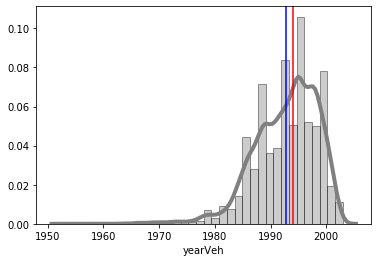

In [118]:
#Untuk melihat nilai mean atau median yang lebih ke arah tengah bentuk distribusi, yang di pilih adalah garis yg lebih ke tengah
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['yearVeh'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['yearVeh'].mean(),color='blue') 
plt.axvline(data['yearVeh'].median(),color='red')

In [119]:
data.drop(['Unnamed: 0','caseid'], axis=1, inplace=True)
data['yearVeh']= data['yearVeh'].fillna(data['yearVeh'].mean())
data['injSeverity']=data['injSeverity'].fillna(data['injSeverity'].mode()[0])
np.sum(data.isnull())

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [120]:
data.describe()

weight       frontal      ageOFocc       yearacc       yearVeh  \
count  26217.000000  26217.000000  26217.000000  26217.000000  26217.000000   
mean     462.811611      0.643323     37.206202   1999.555556   1992.804699   
std     1524.844430      0.479027     17.909317      1.702546      5.594883   
min        0.000000      0.000000     16.000000   1997.000000   1953.000000   
25%       32.467000      0.000000     22.000000   1998.000000   1989.000000   
50%       86.986000      1.000000     33.000000   2000.000000   1994.000000   
75%      364.717000      1.000000     48.000000   2001.000000   1997.000000   
max    57871.595000      1.000000     97.000000   2002.000000   2003.000000   

             deploy   injSeverity  
count  26217.000000  26217.000000  
mean       0.337033      1.723004  
std        0.472705      1.293284  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      3.000000  
max        1.000000      6.000000

In [121]:
korelasi=data.corr()
korelasi

weight   frontal  ageOFocc   yearacc   yearVeh    deploy  \
weight       1.000000 -0.009400 -0.030488  0.009643 -0.011283 -0.061727   
frontal     -0.009400  1.000000 -0.044253  0.014686 -0.028896  0.230715   
ageOFocc    -0.030488 -0.044253  1.000000 -0.006932  0.016451  0.008052   
yearacc      0.009643  0.014686 -0.006932  1.000000  0.296394  0.120818   
yearVeh     -0.011283 -0.028896  0.016451  0.296394  1.000000  0.481904   
deploy      -0.061727  0.230715  0.008052  0.120818  0.481904  1.000000   
injSeverity -0.202345 -0.023224  0.089853 -0.040616 -0.076360  0.062054   

             injSeverity  
weight         -0.202345  
frontal        -0.023224  
ageOFocc        0.089853  
yearacc        -0.040616  
yearVeh        -0.076360  
deploy          0.062054  
injSeverity     1.000000

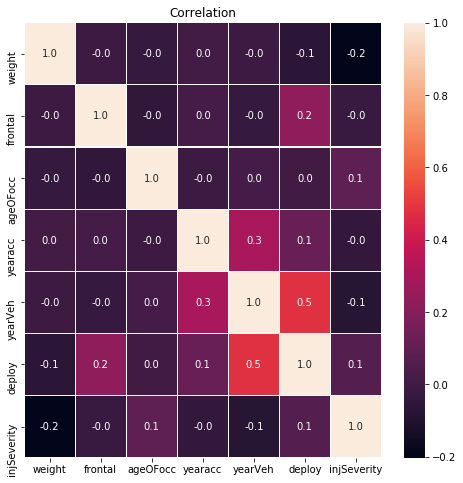

In [122]:
#Correlogram
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(korelasi, annot=True, linewidths=.05, fmt= '.1f', ax=ax)
plt.title("Correlation")
plt.show()

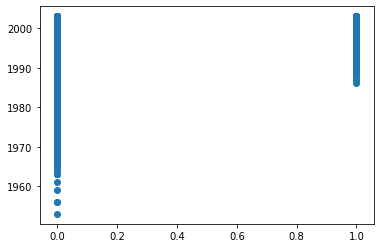

In [123]:
#Scatter plot untuk yearVeh dan deploy
x = data['deploy']
y = data['yearVeh']
plt.scatter(x,y, alpha=1)

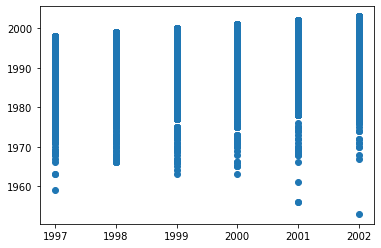

In [124]:
#Scatter plot untuk yearVeh dan deploy
x = data['yearacc']
y = data['yearVeh']
plt.scatter(x,y, alpha=1)

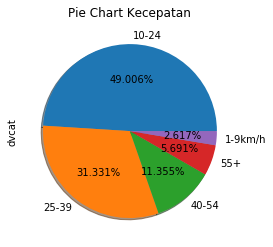

In [125]:
a1 = data['dvcat'].value_counts()
a1.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Pie Chart Kecepatan')
plt.show()

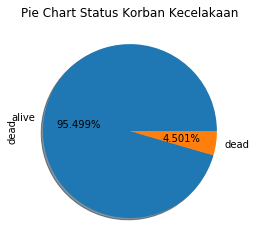

In [126]:
a2 = data['dead'].value_counts()
a2.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Pie Chart Status Korban Kecelakaan')
plt.show()

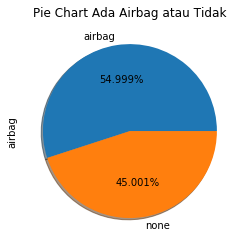

In [127]:
a3 = data['airbag'].value_counts()
a3.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Pie Chart Ada Airbag atau Tidak')
plt.show()

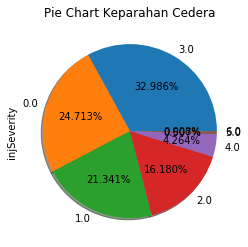

In [128]:
a4 = data['injSeverity'].value_counts()
a4.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Pie Chart Keparahan Cedera')
plt.show()

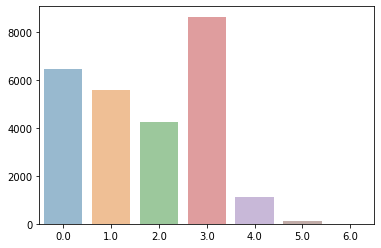

In [129]:
Pie = data['injSeverity'].value_counts()

sns.barplot(Pie.index, Pie.values, alpha=0.5)
plt.show()

In [130]:
count_inj=pd.DataFrame(data['injSeverity'].value_counts()).sort_index()
count_inj

injSeverity
0.0         6479
1.0         5595
2.0         4242
3.0         8648
4.0         1118
5.0          133
6.0            2

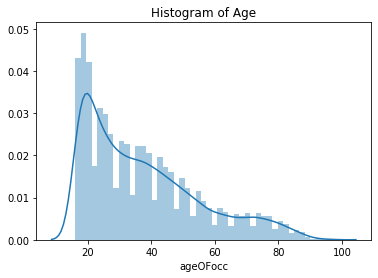

In [131]:
sns.distplot(data['ageOFocc'])
plt.title("Histogram of Age")
plt.show()

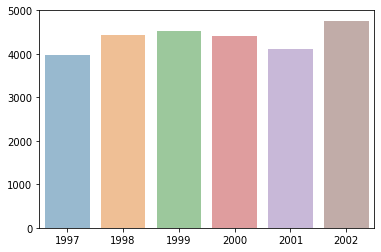

In [132]:
sns.barplot(data['yearacc'].value_counts().index, data['yearacc'].value_counts().values, alpha=0.5)
plt.show()

In [133]:
count_year=pd.DataFrame(data['yearacc'].value_counts()).sort_index()
count_year

yearacc
1997     3975
1998     4427
1999     4516
2000     4420
2001     4115
2002     4764

In [134]:
#Jumlah Korban pada Masing-Masing Usia
count_age=pd.DataFrame(data['ageOFocc'].value_counts()).sort_index()
count_age

ageOFocc
16       856
17      1089
18      1106
19      1112
20       969
..       ...
93         9
94         3
95         2
96         2
97         7

[82 rows x 1 columns]

In [135]:
#Feature Selection

feature = data.iloc[0:1000,7:10]
feature.head()

ageOFocc  yearacc  yearVeh
0        26     1997   1990.0
1        72     1997   1995.0
2        69     1997   1988.0
3        53     1997   1995.0
4        32     1997   1988.0

[ 50.36 100.   100.  ]


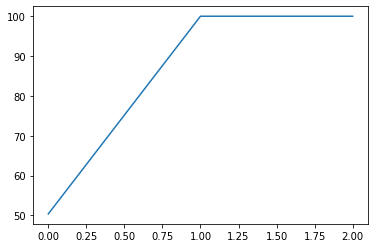

In [136]:
#convert it numpy array
a=feature.values

#scallling the values
a=scale(a)
pca=PCA(n_components=3)
pca.fit(a)

#the amount of variance PC
var=pca.explained_variance_ratio_

#the amount of variance PC
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

print (var1)
plt.plot(var1)

In [137]:
#looking at above plot
pca = PCA(n_components=3)
pca.fit(a)
b=pca.fit_transform(a)

print(b)

[[ 0.57548772 -0.33743461  0.        ]
 [-1.92572366  0.57886926  0.        ]
 [-0.70484769  1.5768638  -0.        ]
 ...
 [-1.46262016 -0.51819725 -0.        ]
 [ 0.64234402  0.54665359  0.        ]
 [ 0.23869996 -1.26857285  0.        ]]


In [138]:
feature1=pd.DataFrame(b)
feature1.head()

0         1    2
0  0.575488 -0.337435  0.0
1 -1.925724  0.578869  0.0
2 -0.704848  1.576864 -0.0
3 -1.219932 -0.126922 -0.0
4  0.669588  0.202428  0.0

### DECISION TREE (80:20)

In [139]:
import pydotplus
from sklearn import tree
import collections
import pandas as pd
from pandas import DataFrame
import numpy as np

In [140]:
data2= DataFrame(data,columns=['dvcat','weight','abcat','dead','airbag','seatbelt','sex','frontal','occRole','deploy','injSeverity'])
data2

dvcat    weight     abcat   dead  airbag seatbelt sex  frontal occRole  \
0      25-39    25.069   unavail  alive    none   belted   f        1  driver   
1      10-24    25.069    deploy  alive  airbag   belted   f        1  driver   
2      10-24    32.379   unavail  alive    none     none   f        1  driver   
3      25-39   495.444    deploy  alive  airbag   belted   f        1  driver   
4      25-39    25.069   unavail  alive    none   belted   f        1  driver   
...      ...       ...       ...    ...     ...      ...  ..      ...     ...   
26212  25-39  3179.688   unavail  alive    none   belted   m        1  driver   
26213  10-24    71.228  nodeploy  alive  airbag   belted   m        1  driver   
26214  10-24    10.474    deploy  alive  airbag   belted   f        1  driver   
26215  25-39    10.474    deploy  alive  airbag   belted   f        1  driver   
26216  25-39    10.474    deploy  alive  airbag   belted   m        1    pass   

       deploy  injSeverity  
0           0          3.0  
1           1          1.0  
2           0          4.0  
3           1          1.0  
4           0          3.0  
...       ...          ...  
26212       0          0.0  
26213       0          2.0  
26214       1          3.0  
26215       1          0.0  
26216       1          0.0  

[26217 rows x 11 columns]

In [141]:
data2['dvcat']=data2['dvcat'].map({'1-9km/h':0,'10-24':1,'25-39':2,'40-54':3,'55+':4})
data2['abcat']=data2['abcat'].map({'deploy':0,'nodeploy':1,'unavail':2})
data2['airbag']=data2['airbag'].map({'none':0,'airbag':1})
data2['seatbelt']=data2['seatbelt'].map({'none':0,'belted':1})
data2['sex']=data2['sex'].map({'f':0,'m':1})
data2['occRole']=data2['occRole'].map({'driver':0,'pass':1})
data2['dead']=data2['dead'].map({'alive':0,'dead':1})
data2['injSeverity']=data2['injSeverity'].map({0.0:1, 1.0:1,2.0:2,3.0:3,4.0:4,5.0:5,6.0:6})

data2.head()

dvcat   weight  abcat  dead  airbag  seatbelt  sex  frontal  occRole  \
0      2   25.069      2     0       0         1    0        1        0   
1      1   25.069      0     0       1         1    0        1        0   
2      1   32.379      2     0       0         0    0        1        0   
3      2  495.444      0     0       1         1    0        1        0   
4      2   25.069      2     0       0         1    0        1        0   

   deploy  injSeverity  
0       0            3  
1       1            1  
2       0            4  
3       1            1  
4       0            3

In [142]:
y = data2['dead']
x = data2.drop(['dead'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [143]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26212    0
26213    0
26214    0
26215    0
26216    0
Name: dead, Length: 26217, dtype: int64

In [144]:
x

dvcat    weight  abcat  airbag  seatbelt  sex  frontal  occRole  \
0          2    25.069      2       0         1    0        1        0   
1          1    25.069      0       1         1    0        1        0   
2          1    32.379      2       0         0    0        1        0   
3          2   495.444      0       1         1    0        1        0   
4          2    25.069      2       0         1    0        1        0   
...      ...       ...    ...     ...       ...  ...      ...      ...   
26212      2  3179.688      2       0         1    1        1        0   
26213      1    71.228      1       1         1    1        1        0   
26214      1    10.474      0       1         1    0        1        0   
26215      2    10.474      0       1         1    0        1        0   
26216      2    10.474      0       1         1    1        1        1   

       deploy  injSeverity  
0           0            3  
1           1            1  
2           0            4  
3           1            1  
4           0            3  
...       ...          ...  
26212       0            1  
26213       0            2  
26214       1            3  
26215       1            1  
26216       1            1  

[26217 rows x 10 columns]

In [145]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state=123)
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [146]:
DecisionTree.score(x_train, y_train)

0.9996662375435084

In [147]:
DecisionTree.score(x_test, y_test)

0.9918001525553013

In [148]:
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

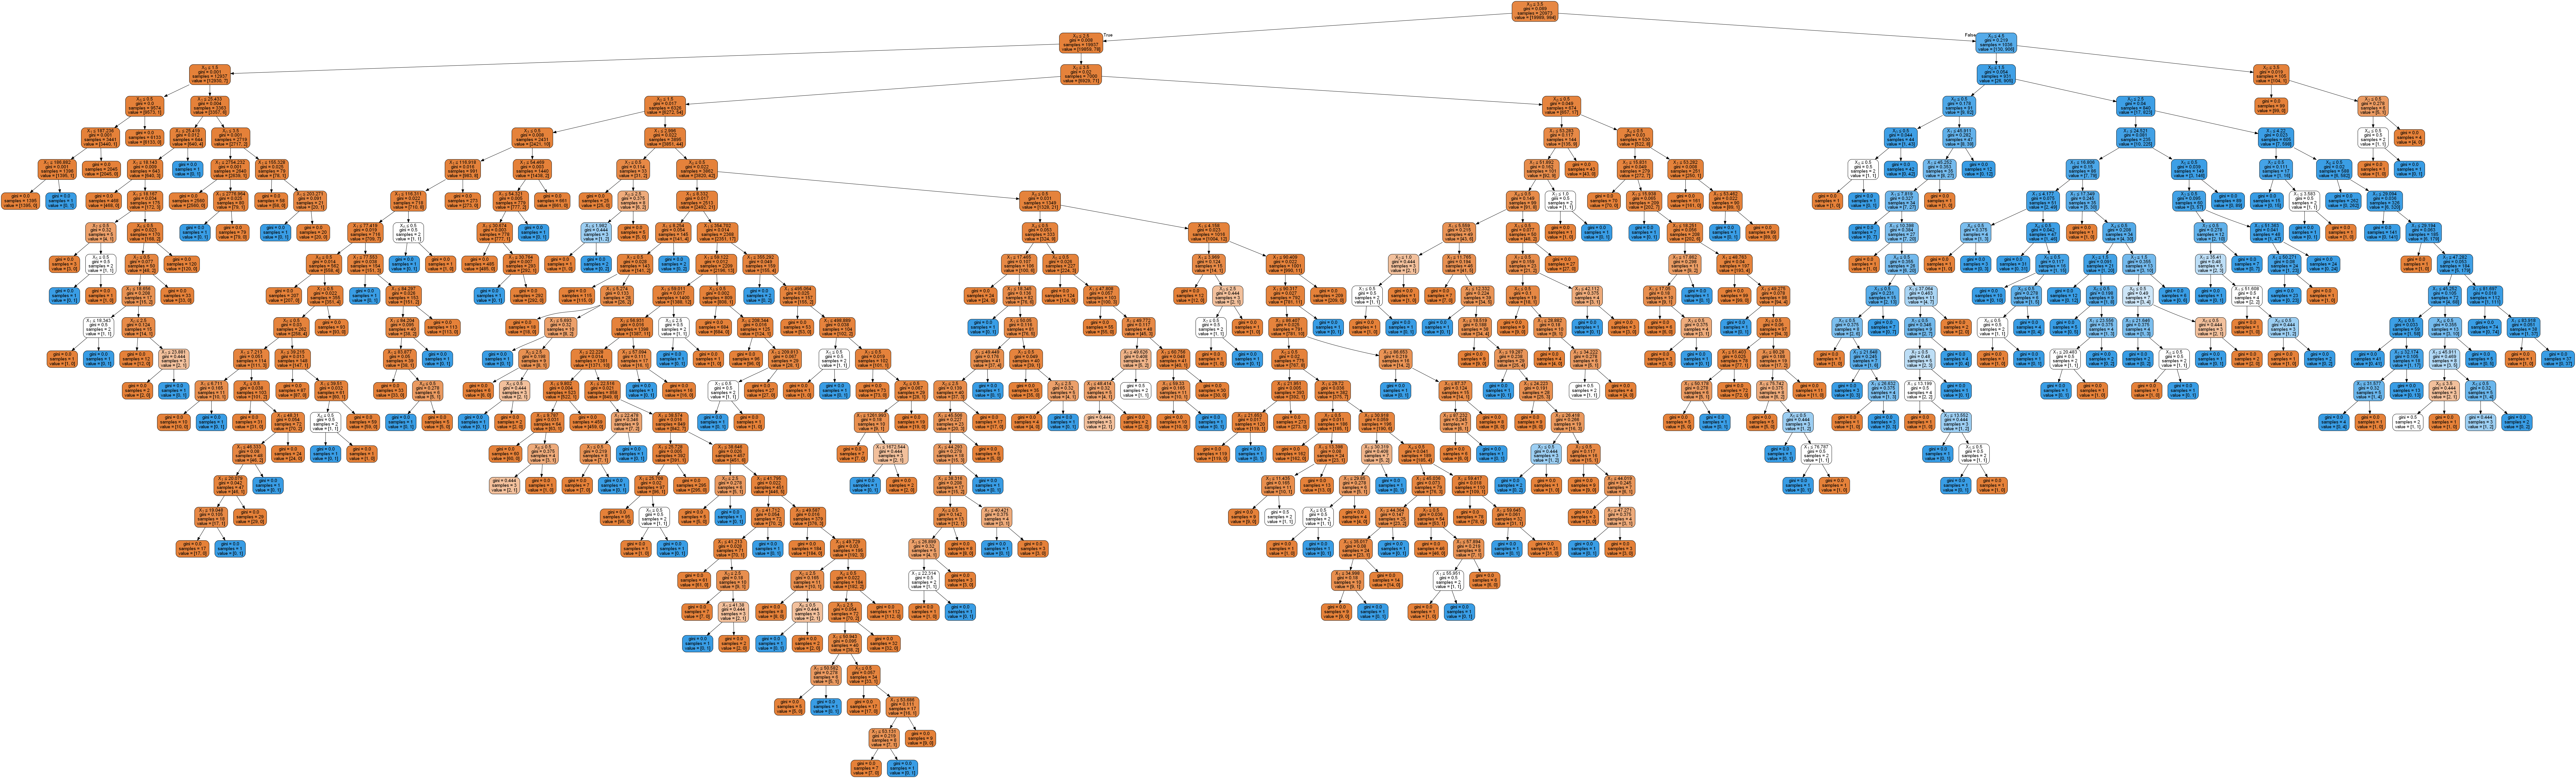

In [149]:
# Create DOT data
dot_data = export_graphviz(DecisionTree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### HOLDOUT STRATIFIED DECISION TREE

In [150]:
y = data2['dead']
x = (data2.drop(['dead'], axis=1))

In [151]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, stratify = y, test_size=0.3,random_state=123)

In [152]:
DecisionTree = DecisionTreeClassifier(random_state=123)
y_pred = DecisionTree.fit(X_train, Y_train).predict(X_test)

In [153]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[7471   41]
 [  46  308]]


In [154]:
akurasi=accuracy_score(Y_test, y_pred)
presisi=precision_score(Y_test, y_pred, pos_label=0, average=None)
recalls=recall_score(Y_test,y_pred, pos_label=0, average=None)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [155]:
print(akurasi)
print(presisi)
print(recalls)

0.9889397406559878
[0.99388054 0.88252149]
[0.99454207 0.8700565 ]


In [156]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9889397406559878
0.9382010137098984
0.9322992816014151


### KFOLD CV DECISION TREE

In [157]:
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state=123)
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
results_kfold

array([0.98855835, 0.99141876, 0.99046348, 0.99027274, 0.98722106])

In [158]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 98.96%


### Model tuning decision tree (80:20)

In [159]:
def GridSearch(x, y, model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
    clf.fit(x, y)
    print("Best Score: "+str(clf.best_score_))
    print("Best Params: "+str(clf.best_params_))
    return (clf)

In [160]:
ListParams = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto','sqrt','log2',None],
    'max_depth':[2,3,5,6,9],
    'class_weight':['balanced', None]
}

BestDecisionTree = GridSearch(x_train, y_train, DecisionTreeClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:   10.4s


Best Score: 0.9949936085548172
Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   12.5s finished


In [161]:
BestDecisionTree.score(x_train, y_train)

0.9949935631526248

In [162]:
BestDecisionTree.score(x_test, y_test)

0.9952326468344775

In [163]:
BestDecisionTree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best')
BestDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

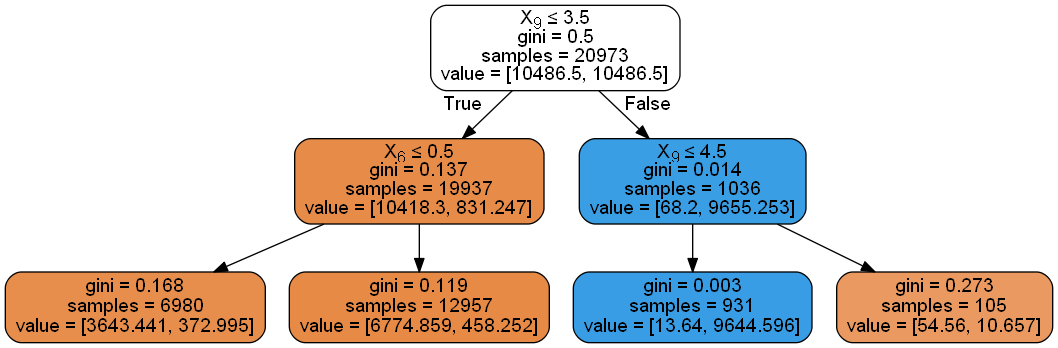

In [164]:
# Create DOT data
dot_data = export_graphviz(BestDecisionTree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### HOLDOUT STRATIFIED DECISION TREE TUNING

In [399]:
y = data2['dead']
x = data2.drop(['dead'], axis=1)

In [400]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, stratify = y, test_size=0.3,random_state=123)

In [401]:
BestDecisionTree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best')
y_pred = BestDecisionTree.fit(X_train, Y_train).predict(X_test)

In [402]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[7506    6]
 [  35  319]]


In [403]:
akurasi=accuracy_score(Y_test, y_pred)
presisi=precision_score(Y_test, y_pred, pos_label=0, average=None)
recalls=recall_score(Y_test,y_pred, pos_label=0, average=None)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [404]:
print(akurasi)
print(presisi)
print(recalls)

0.9947876938723621
[0.99535871 0.98153846]
[0.99920128 0.90112994]


In [405]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9947876938723621
0.9884485836402028
0.9501656107290481


### ROC HOLDOUT STRATIFIED DECISION TREE TUNING

In [406]:
dt= DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best').fit(X_train, Y_train)
Y_test_preddt =dt.predict(X_test)
Y_train_preddt =dt.predict(X_train) 
CMGB = confusion_matrix(Y_test, Y_test_preddt)
print("Number of mislabeled points out of a total %d total : %d" % (X_test.shape[0],(Y_test!=Y_test_preddt).sum()))
print('Confusion Matrix : \n', CMGB)

Number of mislabeled points out of a total 7866 total : 41
Confusion Matrix : 
 [[7506    6]
 [  35  319]]


In [407]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, auc, roc_curve, f1_score, classification_report
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_preddt)
aucdt = auc(fpr, tpr)

In [408]:
print('precision on the evaluation set: ', precision_score(Y_test, Y_test_preddt))
print('accuracy on the evaluation set: ', accuracy_score(Y_test, Y_test_preddt))
print ('AUC on the evaluation set : ', aucdt)

precision on the evaluation set:  0.9815384615384616
accuracy on the evaluation set:  0.9947876938723621
AUC on the evaluation set :  0.9501656107290481


In [409]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [410]:
cm.append((confusion_matrix(Y_test, Y_test_preddt)).astype(float))
for j in range (1):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print("akurasi = ",akurasi)
print("Spesifisiti = ",spesifisiti)
print("sensitiviti = ",sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (1):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

akurasi =  0.9947876938723621
Spesifisiti =  0.9011299435028248
sensitiviti =  0.9992012779552716


Akurasi  Spesitifitas  Sensitivitas
0  0.994788       0.90113      0.999201

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':


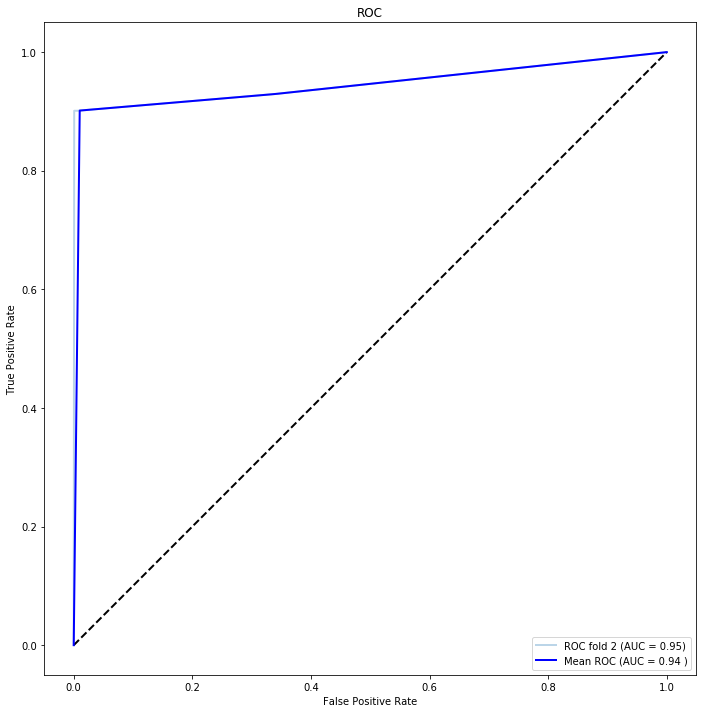

In [411]:
from scipy import interp
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
prediction=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best').fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, t = roc_curve(Y_test, prediction[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

### KFOLD CV DECISION TREE TUNING

In [412]:
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold =  DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best')
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
results_kfold

array([0.99446987, 0.99542334, 0.99637612, 0.99580393, 0.9931337 ])

In [413]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 99.50%


### ROC KFOLD CV DECISION TREE TUNING

In [414]:
for train,test in kfold.split(x,y):
    X_train,X_test=x.iloc[train],x.iloc[test]
    Y_train,Y_test=y.iloc[train],y.iloc[test]

In [415]:
dt= DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features='auto', random_state=123, splitter='best').fit(X_train, Y_train)
Akurasidt_CVScore = cross_val_score(dt, x, y, cv=kfold, scoring='accuracy')
F1dt_CVScore = cross_val_score(dt, x, y, cv=kfold, scoring='f1')
presisi_sc = cross_val_score(dt, x, y, cv=kfold, scoring='precision')
AkurasiRandomCV = Akurasidt_CVScore.mean()
F1dtCV = F1dt_CVScore.mean()
presisi = presisi_sc.mean()
print('Akurasi :', AkurasiRandomCV)
print('F1 :', F1dtCV)
print('Presisi :', presisi)

Akurasi : 0.9950413925915969
F1 : 0.9424041738715138
Presisi : 0.9697300724594757


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[

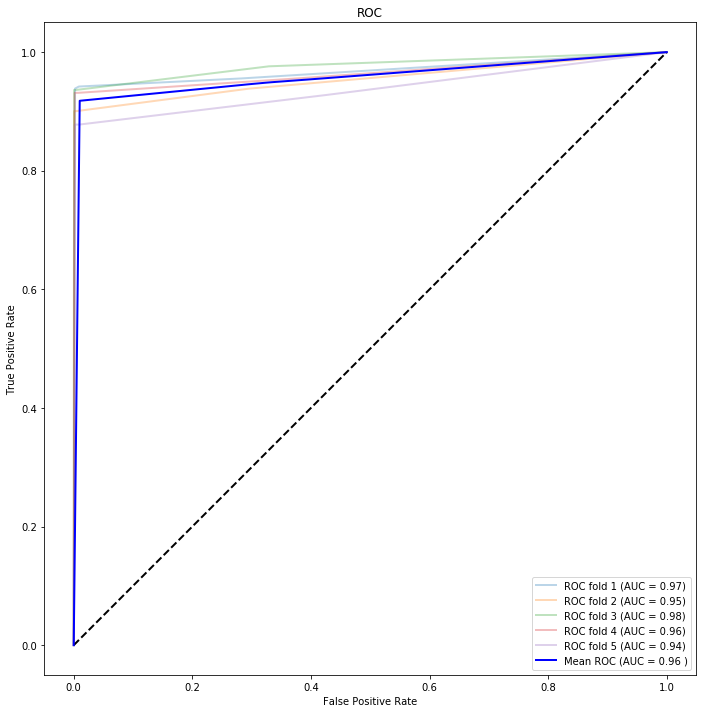

In [416]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in kfold.split(x,y):
    prediction = BestDecisionTree.fit(X_train, Y_train).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

### NAIVE BAYES (80:20)

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [418]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()
nbtrain=modelnb.fit(X_train,Y_train)
nbtrain.class_count_

array([20015.,   959.])

In [419]:
# fit train set using Gaussian Naive Bayes
modelnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [420]:
# Nilai akurasi data training
modelnb.score(X_train, Y_train)

0.9862687136454659

In [421]:
y_pred = nbtrain.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [422]:
nbtrain.predict_proba(X_test)

array([[1.00000000e+00, 3.40912681e-23],
       [9.77031060e-01, 2.29689402e-02],
       [9.64562081e-01, 3.54379190e-02],
       ...,
       [9.99355240e-01, 6.44759973e-04],
       [1.00000000e+00, 4.44259069e-24],
       [1.00000000e+00, 8.44321534e-24]])

In [423]:
confusion_matrix(Y_test, y_pred)

array([[4976,   46],
       [  30,  191]], dtype=int64)

In [424]:
#Nilai akurasi data testing
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test, y_pred)
accuracy

0.9855044821666985

### HOLDOUT STRATIFIED NAIVE BAYES

In [425]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, stratify = y, test_size=0.3,random_state=123)


In [426]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)

In [427]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[7424   88]
 [  35  319]]


In [428]:
akurasi=accuracy_score(Y_test, y_pred)
presisi=precision_score(Y_test, y_pred, pos_label=0, average=None)
recalls=recall_score(Y_test,y_pred, pos_label=0, average=None)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [429]:
print(akurasi)
print(presisi)
print(recalls)

0.9843630816170862
[0.99530768 0.78378378]
[0.98828541 0.90112994]


In [430]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9843630816170862
0.8895457328893446
0.9447076767567373


### ROC HOLDOUT STRATIFIED NAIVE BAYES

In [431]:
gnb = GaussianNB().fit(X_train, Y_train)
Y_test_predgnb =gnb.predict(X_test)
Y_train_predgnb =gnb.predict(X_train) 
CMGB = confusion_matrix(Y_test, Y_test_predgnb)
print("Number of mislabeled points out of a total %d total : %d" % (X_test.shape[0],(Y_test!=Y_test_predgnb).sum()))
print('Confusion Matrix : \n', CMGB)

Number of mislabeled points out of a total 7866 total : 123
Confusion Matrix : 
 [[7424   88]
 [  35  319]]


In [432]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, auc, roc_curve, f1_score, classification_report
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predgnb)
aucgnb = auc(fpr, tpr)

In [433]:
print('precision on the evaluation set: ', precision_score(Y_test, Y_test_predgnb))
print('accuracy on the evaluation set: ', accuracy_score(Y_test, Y_test_predgnb))
print ('AUC on the evaluation set : ', aucgnb)

precision on the evaluation set:  0.7837837837837838
accuracy on the evaluation set:  0.9843630816170862
AUC on the evaluation set :  0.9447076767567372


In [434]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [435]:
cm.append((confusion_matrix(Y_test, Y_test_predgnb)).astype(float))
for j in range (1):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print("akurasi = ",akurasi)
print("Spesifisiti = ",spesifisiti)
print("sensitiviti = ",sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (1):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

akurasi =  0.9843630816170862
Spesifisiti =  0.9011299435028248
sensitiviti =  0.9882854100106496


Akurasi  Spesitifitas  Sensitivitas
0  0.984363       0.90113      0.988285

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':


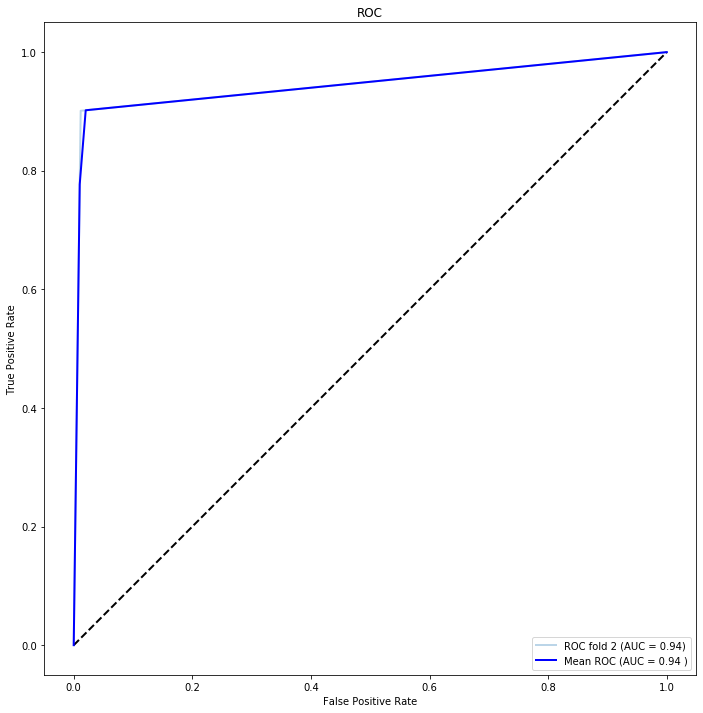

In [436]:
from scipy import interp
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

prediction = GaussianNB().fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, t = roc_curve(Y_test, Y_test_predgnb)
tprs.append(interp(mean_fpr, fpr, tpr))
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

### KFOLD CV NAIVE BAYES

In [437]:
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold =GaussianNB()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
results_kfold

array([0.95690313, 0.97959573, 0.97482357, 0.97406065, 0.98550448])

In [438]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 97.42%


In [456]:
for train,test in kfold.split(x,y):
    X_train,X_test=x.iloc[train],x.iloc[test]
    Y_train,Y_test=y.iloc[train],y.iloc[test]

In [464]:
gnb =GaussianNB().fit(X_train, Y_train)
Akurasignb_CVScore = cross_val_score(gnb, x, y, cv=kfold, scoring='accuracy')
F1gnb_CVScore = cross_val_score(gnb, x, y, cv=kfold, scoring='f1')
presisi_sc = cross_val_score(gnb, x, y, cv=kfold, scoring='precision')
AkurasiRandomCV = Akurasignb_CVScore.mean()
F1gnbCV = F1gnb_CVScore.mean()
presisi = presisi_sc.mean()
print('Akurasi :', AkurasiRandomCV)
print('F1 :', F1gnbCV)
print('Presisi :', presisi)

Akurasi : 0.9741775129179541
F1 : 0.7685782951760547
Presisi : 0.6682162500814666


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[

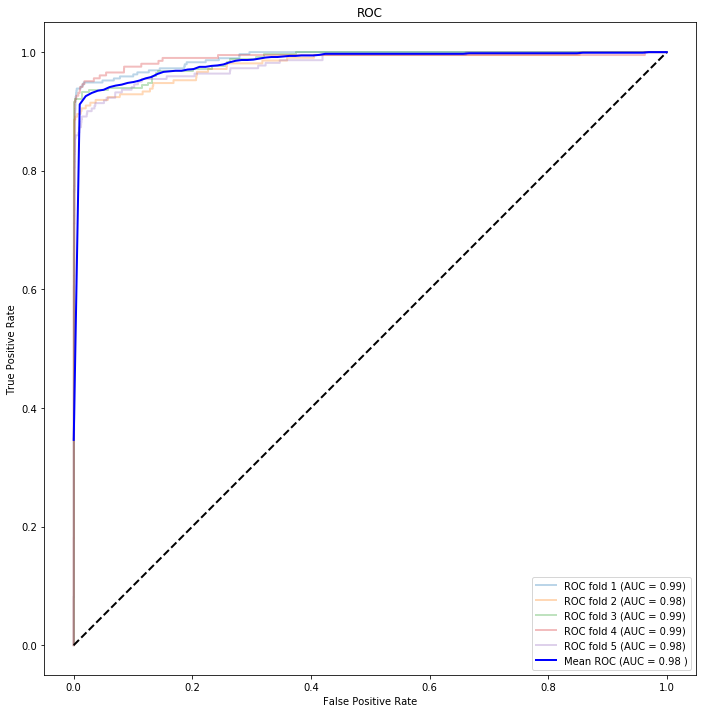

In [472]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in kfold.split(x,y):
    prediction = model_kfold.fit(X_train,Y_train).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test],prediction[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

### svm

In [494]:
y = (data2['dead'])
x = (data2.drop(['dead'], axis=1))
y=y.values
X=x.values
from sklearn.metrics import roc_auc_score
from sklearn import svm

###  HOLDOUT STRATIFIED SVM

In [475]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, stratify = y, test_size=0.3,random_state=123)

In [476]:
from sklearn.svm import SVC
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=123)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)

In [478]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[7466   46]
 [  35  319]]


In [479]:
akurasi=accuracy_score(Y_test, y_pred)
presisi=precision_score(Y_test, y_pred, pos_label=0, average=None)
recalls=recall_score(Y_test,y_pred, pos_label=0, average=None)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [480]:
print(akurasi)
print(presisi)
print(recalls)

0.9897025171624714
[0.99533396 0.8739726 ]
[0.99387646 0.90112994]


In [481]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9897025171624714
0.9346532791061648
0.9475032039132867


### ROC HOLDOUT SVM

In [482]:
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=123)
svm = classifier.fit(X_train, Y_train)
Y_test_predsvm =svm.predict(X_test)
Y_train_predsvm =svm.predict(X_train) 
CMGB = confusion_matrix(Y_test, Y_test_predsvm)
print("Number of mislabeled points out of a total %d total : %d" % (X_test.shape[0],(Y_test!=Y_test_predsvm).sum()))
print('Confusion Matrix : \n', CMGB)

Number of mislabeled points out of a total 7866 total : 81
Confusion Matrix : 
 [[7466   46]
 [  35  319]]


In [483]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, auc, roc_curve, f1_score, classification_report
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predsvm)
aucsvm = auc(fpr, tpr)

In [484]:
print('precision on the evaluation set: ', precision_score(Y_test, Y_test_predsvm))
print('accuracy on the evaluation set: ', accuracy_score(Y_test, Y_test_predsvm))
print ('AUC on the evaluation set : ', aucsvm)

precision on the evaluation set:  0.873972602739726
accuracy on the evaluation set:  0.9897025171624714
AUC on the evaluation set :  0.9475032039132868


In [485]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [486]:
cm.append((confusion_matrix(Y_test, Y_test_predsvm)).astype(float))
for j in range (1):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print("akurasi = ",akurasi)
print("Spesifisiti = ",spesifisiti)
print("sensitiviti = ",sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (1):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

akurasi =  0.9897025171624714
Spesifisiti =  0.9011299435028248
sensitiviti =  0.9938764643237487


Akurasi  Spesitifitas  Sensitivitas
0  0.989703       0.90113      0.993876

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':


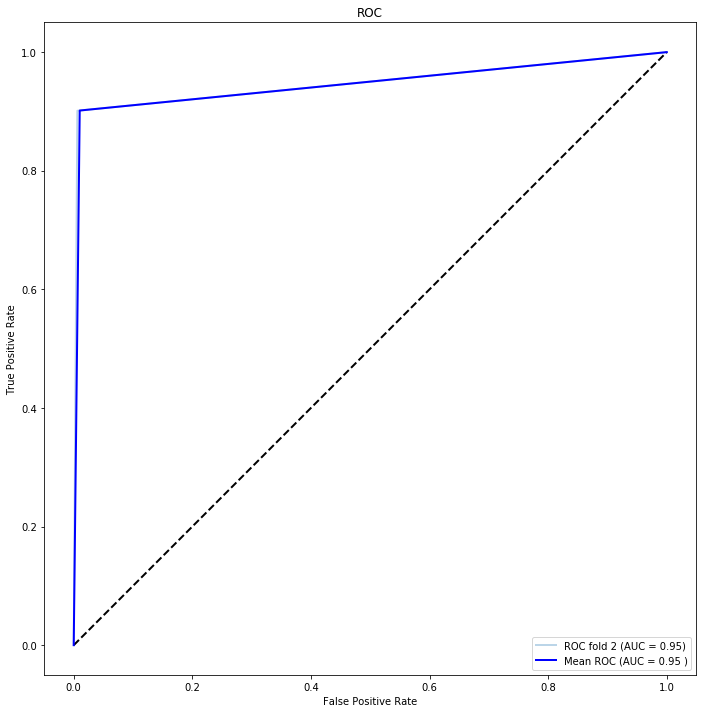

In [492]:
from scipy import interp
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

prediction = classifier.fit(X_train,Y_train).predict_proba(X_test)
fpr, tpr, t = roc_curve(Y_test, Y_test_predsvm)
tprs.append(interp(mean_fpr, fpr, tpr))
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

### KFOLD SV SVM

In [495]:
cv=StratifiedKFold(n_splits=5,random_state=None)
ss=svm.SVC(class_weight=None,random_state=123)
model=ss.fit(X,y)

In [496]:
parameter={
    'kernel':('linear','poly','rbf'),
    'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
    'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}
grid=GridSearchCV(model,parameter,cv=cv,n_jobs=1,scoring='accuracy')
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [497]:
from sklearn import svm
svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=123)
n=5
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=n,random_state=None)

In [498]:
svm.fit(X, y)
y_pred = svm.predict(X)

In [499]:
cm=[]
total=[]
ac=[]
se=[]
sp=[]

In [500]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
print(akurasi)
print(spesifisiti)
print(sensitiviti)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

0.9900064202416996
0.9177966101694915
0.9934097215974311


Akurasi  Spesitifitas  Sensitivitas
0  0.989512      0.944915      0.991613
1  0.992182      0.911017      0.996006
2  0.992943      0.927966      0.996006
3  0.989510      0.932203      0.992211
4  0.985886      0.872881      0.991212

### ROC KFOLD CV SVM

In [55]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [59]:
y = np.array(data2['dead'])
x = np.array(data2.drop(['dead'], axis=1))
x, y = x[y != 2], y[y != 2]
n_samples, n_features = x.shape

# Add noisy features
random_state = np.random.RandomState(0)
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


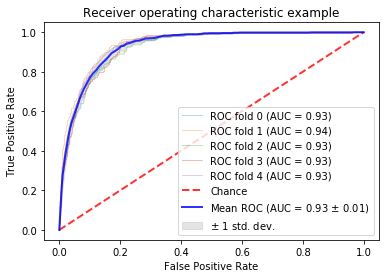

In [61]:
# #############################################################################
# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(x, y):
    prediction = classifier.fit(x[train], y[train]).predict_proba(x[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()